<a href="https://colab.research.google.com/github/benMiniconi/dataWork/blob/master/CarModel/LinearRegressionTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
carsData = pd.read_csv("./CarModel/AutoAnalysisModel.csv", sep=";")

In [221]:
carsData.tail(5)

,CleanerCylindree,Age,UniqDetail,Price,Immat,KM,Power,modele,marque,annee,...,typedepeinture,couleuroriginale,versionpays,interieur 1,carrosserie,portes,sieges,cylindree,transmission,File Paths
209039,5.474,21,165000495005501999coupe,165000,01/06/1999,49500,485,550,ferrari,01/01/1999,...,NaN,rossocorsa,NaN,cuirnoir,coupe,2.0,2.0,5.474cm³,boîtemanuelle,auto24Ferrari1999.csv
209040,4.943,21,250000249005121999coupe,250000,01/04/1999,24900,428,512,ferrari,01/01/1999,...,NaN,rosso,NaN,cuirnoir,coupe,2.0,2.0,4.943cm³,boîtemanuelle,auto24Ferrari1999.csv
209041,4.942,34,14900093000testarossa1986coupe,149000,01/10/1986,93000,390,testarossa,ferrari,01/01/1986,...,metallise,bluserametalizzato,NaN,cuirautres,coupe,2.0,2.0,4.942cm³,boîtemanuelle,auto24Ferrari2000.csv
209042,3.200,34,3390060000mondial1986cabriolet,33900,01/01/1986,60000,271,mondial,ferrari,01/01/1986,...,NaN,NaN,belgique,cuirbeige,cabriolet,2.0,4.0,3.200cm³,boîtemanuelle,auto24Ferrari2000.csv
209043,3.186,34,4300040918mondial1986coupe,43000,01/03/1986,40918,271,mondial,ferrari,01/01/1986,...,metallise,NaN,NaN,cuirbeige,coupe,2.0,4.0,3.186cm³,boîtemanuelle,auto24Ferrari2000.csv


In [0]:
# Let's replace the 'transmission' with integers before performing any visualizations 
carsData['transmission'] = carsData['transmission'].apply(lambda x: 0 if x == 'boîtemanuelle' else 1)
carsData['versionpays'] =  carsData['versionpays'].fillna("other")
carsData['Age'] =  carsData['Age'].fillna(0)
carsData['KM'] =  carsData['KM'].fillna(0)
carsData['couleuroriginale'] =  carsData['couleuroriginale'].fillna("autre")
carsData['modele'] =  carsData['modele'].fillna("autre")
carsData['marque'] =  carsData['marque'].fillna("autre")
carsData['Power'] =  carsData['Power'].fillna(0)
carsData['transmission'] = carsData['transmission'].fillna(2)
carsData['CleanerCylindree'] = carsData['CleanerCylindree'].fillna(0)
carsData['Price'] = carsData['Price'].fillna(0)
carsData["carrosserie"] = carsData["carrosserie"].fillna("autre")


In [0]:
  #Keep only the items with clean data
  #cleanerCarsData = carsData[carsData["transmission"] != 2]
  #cleanerCarsData = cleanerCarsData[cleanerCarsData["Price"] > 1000]
  #cleanerCarsData = cleanerCarsData[cleanerCarsData["KM"] > 0]
  #cleanerCarsData = cleanerCarsData[cleanerCarsData["carrosserie"] != "autre"]

In [223]:
carsData

,CleanerCylindree,Age,UniqDetail,Price,Immat,KM,Power,modele,marque,annee,...,typedepeinture,couleuroriginale,versionpays,interieur 1,carrosserie,portes,sieges,cylindree,transmission,File Paths
0,3.600,19,409961800009112001coupe,40996,01/04/2001,180000,420,911,porsche,01/01/2001,...,metallise,autre,other,NaN,coupe,2.0,4.0,3.600cm³,0,auto24Porsche2008.csv
1,3.600,19,410001160009112001coupe,41000,01/06/2001,116000,420,911,porsche,01/01/2001,...,metallise,autre,other,NaN,coupe,2.0,2.0,3.600cm³,0,auto24Porsche2008.csv
2,3.600,19,429901000009962001coupe,42990,01/06/2001,100000,420,996,porsche,01/01/2001,...,metallise,negro,other,NaN,coupe,2.0,4.0,3.600cm³,1,auto24Porsche2008.csv
3,3.600,19,44900860009962001coupe,44900,01/05/2001,86000,420,996,porsche,01/01/2001,...,metallise,polarsilber,other,cuirgris,coupe,2.0,4.0,3.600cm³,1,auto24Porsche2008.csv
4,3.387,19,45000200009112001coupe,45000,01/07/2001,20000,300,911,porsche,01/01/2001,...,metallise,autre,other,NaN,coupe,2.0,4.0,3.387cm³,0,auto24Porsche2008.csv
5,3.600,19,450001780009112001coupe,45000,01/04/2001,178000,420,911,porsche,01/01/2001,...,NaN,autre,other,NaN,coupe,2.0,2.0,3.600cm³,1,auto24Porsche2008.csv
6,3.387,19,45000388349962001coupe,45000,01/04/2001,38834,300,996,porsche,01/01/2001,...,metallise,autre,other,cuirnoir,coupe,2.0,4.0,3.387cm³,0,auto24Porsche2008.csv
7,3.600,19,455001260009112001coupe,45500,01/06/2001,126000,420,911,porsche,01/01/2001,...,metallise,autre,other,cuir,coupe,2.0,4.0,3.600cm³,0,auto24Porsche2008.csv
8,3.600,19,458001390009962001coupe,45800,01/02/2001,139000,420,996,porsche,01/01/2001,...,metallise,autre,allemagne,cuirbeige,coupe,2.0,4.0,3.600cm³,1,auto24Porsche2008.csv
9,3.387,19,45900630009962001cabriolet,45900,01/07/2001,63000,300,996,porsche,01/01/2001,...,metallise,autre,other,NaN,cabriolet,2.0,4.0,3.387cm³,0,auto24Porsche2008.csv


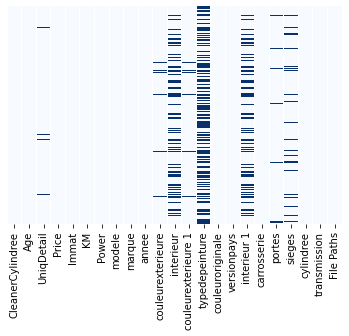

In [224]:
# Let's see if we have any missing data, luckily we don't! one the targeted field
sns.heatmap(carsData.isnull(), yticklabels = False, cbar = False, cmap="Blues")

/Users/benjamindeplus/.local/share/virtualenvs/dataWork-cjT1BSgG/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/benjamindeplus/.local/share/virtualenvs/dataWork-cjT1BSgG/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/benjamindeplus/.local/share/virtualenvs/dataWork-cjT1BSgG/lib/python3.7/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13a164250>,
      dtype=object)

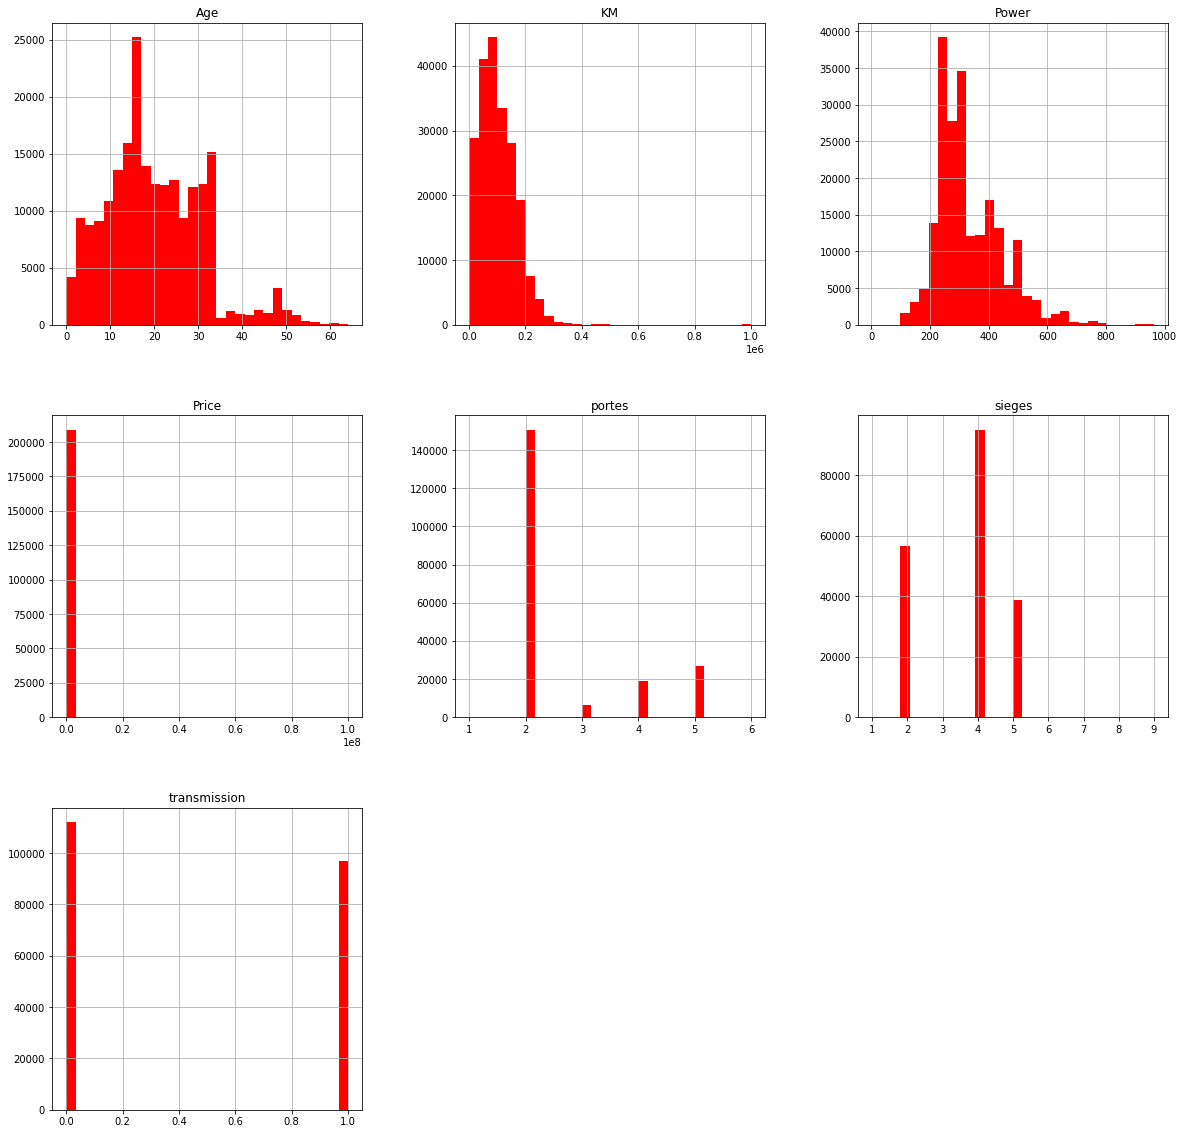

In [210]:
carsData.hist(bins = 30, figsize = (20,20), color = 'r')

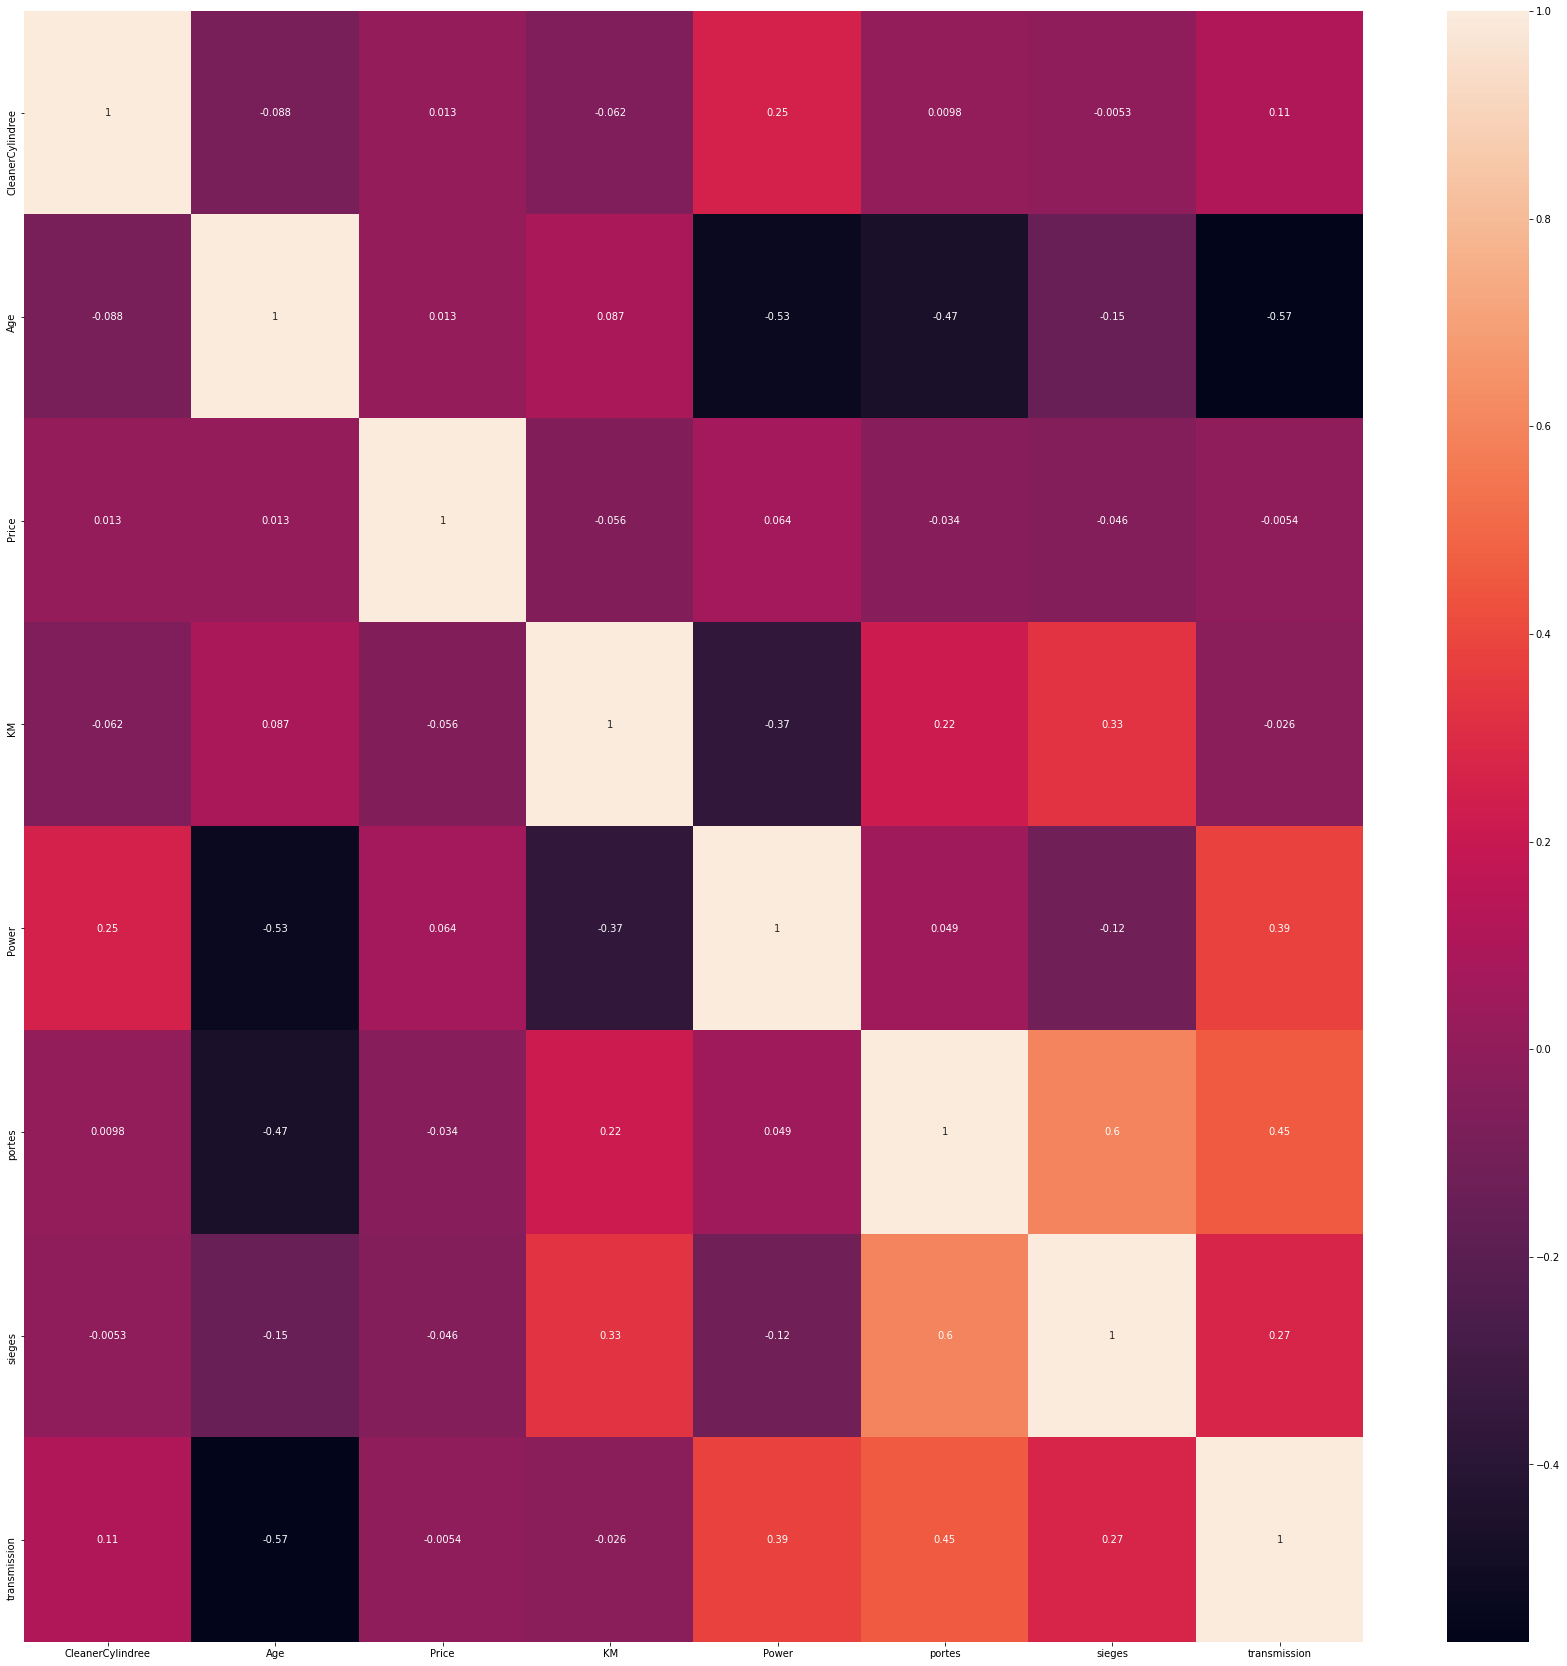

In [225]:
correlations = carsData.corr()
f, ax = plt.subplots(figsize = (30, 30))
sns.heatmap(correlations, annot = True)


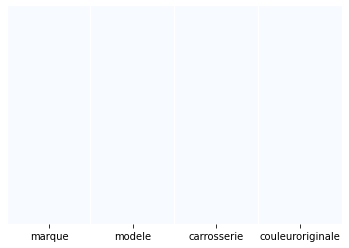

In [226]:
#Selecting the cat to fit
X_cat = carsData[['marque', 'modele', "carrosserie", "couleuroriginale"]]
#X_cat = carsData[['marque', 'modele']]
sns.heatmap(X_cat.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [227]:
X_cat.info

<bound method DataFrame.info of          marque      modele carrosserie    couleuroriginale
0       porsche         911       coupe               autre
1       porsche         911       coupe               autre
2       porsche         996       coupe               negro
3       porsche         996       coupe         polarsilber
4       porsche         911       coupe               autre
5       porsche         911       coupe               autre
6       porsche         996       coupe               autre
7       porsche         911       coupe               autre
8       porsche         996       coupe               autre
9       porsche         996   cabriolet               autre
10      porsche         911       coupe               autre
11      porsche         911       coupe               autre
12      porsche         911       coupe             schwarz
13      porsche         911       coupe             grijsm.
14      porsche         996       coupe             grijsm.
15      

In [0]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
#Preparing Categories for fitting modele
X_cat = carsData[['marque', 'modele', "carrosserie"]]
#X_cat = carsData[['marque', 'modele']]
X_cat = onehotencoder.fit_transform(X_cat).toarray()
X_cats = pd.DataFrame(X_cat)
#Fitting Model with Cat before numerical values

In [229]:
X_cats.shape

(209044, 123)

In [0]:
#X_cat = pd.DataFrame(X_cat)

In [230]:
X_cats

,0,1,2,3,4,5,6,7,8,9,...,113,114,115,116,117,118,119,120,121,122
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [0]:
#Fitting Model with Cat before numerical values
#from sklearn.preprocessing import OneHotEncoder
#onehotencoder = OneHotEncoder()
#X_cat = onehotencoder.fit_transform(X_cat).toarray()

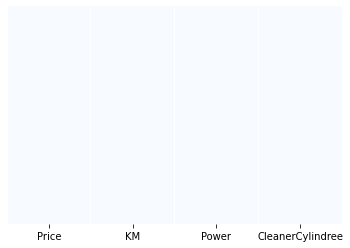

In [231]:
# note that we dropped the target 'Price'
X_numerical = carsData[['Price', 'KM', 'Power',	'CleanerCylindree']]
#X_numerical = carsData[['KM', 'Power']]
sns.heatmap(X_numerical.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [232]:
X_cats.shape

(209044, 123)

In [233]:
#Merge Cat and Numerical Values
X_all = pd.concat([X_cats, X_numerical], axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,Price,KM,Power,CleanerCylindree
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,40996,180000,420,3.600
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,41000,116000,420,3.600
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,42990,100000,420,3.600
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,44900,86000,420,3.600
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,45000,20000,300,3.387
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,45000,178000,420,3.600
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,45000,38834,300,3.387
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,45500,126000,420,3.600
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,45800,139000,420,3.600
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,45900,63000,300,3.387


In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

In [235]:
X.shape

(209044, 127)

In [236]:
#Field to Predict Price
y = carsData['Price']
carsData.shape
X.shape

(209044, 127)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [238]:
X_train.shape

(156783, 127)

In [239]:
X_test.shape

(52261, 127)

In [240]:
y_train.shape

(156783,)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)
